## Preparing data

In [1]:
import pandas as pd
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


def return_inds(strings, list):
    return [i for i,l in enumerate(list) if l in strings] 

In [16]:
bench = 'LMentry' #'BBH'#
assert bench in ['BBH', 'LMentry', 'MMLU']

In [17]:
quantiles = [5,25,50,75,95]
ns = list(range(100,1100,200))

bench_sizes = {
               'BBH': 1500, 
               'LMentry': 926, 
               'MMLU': 14042,
              }

bench_samplesXtemplates = {
                           'BBH': 209280, 
                           'LMentry': 175776, 
                           'MMLU': 1121568,
                          }

len(ns)

5

In [18]:
errors_raw = np.load(f"results/processed_results_{bench}_quantiles_{quantiles}_calibrate_False_TS_True.npy")
n_tasks, n_methods, _, _ = errors_raw.shape
n_methods, errors_raw.shape

(68, (10, 68, 5, 5))

In [19]:
methods_names_full = ['unif1', 'unif2', 'unif-IRT', 'TS-IRT',
                      
                      'unif-IRT-manual', 'unif-IRT-manual2', 'unif-IRT-manual3', 'unif-LR-manual',
                      'TS-unif-IRT-manual', 'TS-unif-IRT-manual2', 'TS-unif-IRT-manual3', 'TS-unif-LR-manual',
                      
                      'unif-IRT-term', 'unif-IRT-term2', 'unif-IRT-term3', 'unif-LR-term',
                      'TS-unif-IRT-term', 'TS-unif-IRT-term2', 'TS-unif-IRT-term3', 'TS-unif-LR-term',

                      'unif-IRT-thetas', 'unif-IRT-thetas2', 'unif-IRT-thetas3', 'unif-LR-thetas',
                      'TS-unif-IRT-thetas', 'TS-unif-IRT-thetas2', 'TS-unif-IRT-thetas3', 'TS-unif-LR-thetas',
                      
                      'unif-IRT-clust', 'unif-IRT-clust2', 'unif-IRT-clust3', 'unif-LR-clust',
                      'TS-unif-IRT-clust', 'TS-unif-IRT-clust2', 'TS-unif-IRT-clust3', 'TS-unif-LR-clust',
                      
                      'unif-IRT-bert', 'unif-IRT-bert2', 'unif-IRT-bert3', 'unif-LR-bert',
                      'TS-unif-IRT-bert', 'TS-unif-IRT-bert2', 'TS-unif-IRT-bert3', 'TS-unif-LR-bert',
                      
                      'unif-IRT-emb', 'unif-IRT-emb2', 'unif-IRT-emb3', 'unif-LR-emb',
                      'TS-unif-IRT-emb', 'TS-unif-IRT-emb2', 'TS-unif-IRT-emb3', 'TS-unif-LR-emb',
                      
                      'unif-IRT-ft-fp', 'unif-IRT-ft-fp2', 'unif-IRT-ft-fp3', 'unif-LR-ft-fp',
                      'TS-unif-IRT-ft-fp', 'TS-unif-IRT-ft-fp2', 'TS-unif-IRT-ft-fp3', 'TS-unif-LR-ft-fp',
                      
                      'unif-IRT-ft-id', 'unif-IRT-ft-id2', 'unif-IRT-ft-id3', 'unif-LR-ft-id',
                      'TS-unif-IRT-ft-id', 'TS-unif-IRT-ft-id2', 'TS-unif-IRT-ft-id3', 'TS-unif-LR-ft-id',
                     ]
                      


methods_names_lucas = ['unif1',
                       #'unif-IRT-manual', #'TS-IRT',
                       #'unif-IRT-thetas',
                       'unif-IRT-bert', #'TS-unif-IRT-bert',
                       'unif-IRT-emb',
                       'unif-IRT-ft-fp', #'TS-unif-IRT-ft-fp', 
                       'unif-IRT-ft-id', #'TS-unif-IRT-ft-id',
                    
                      ]

methods_names_1 = ['unif-IRT-manual', 'TS-IRT-manual',
                    'unif-LR-manual', 'TS-LR-manual',
                    'unif-IRT-train_bert', 'TS-IRT-train_bert',
                    #'unif-IRT-train_bert2', 'TS-IRT-train_bert2',
                    'unif-LR-train_bert', 'TS-LR-train_bert']


methods_names_2 = ['unif1', 'unif2', 
                      'unif-IRT', 'TS-IRT',
                      'unif-IRT-manual', 'TS-IRT-manual',
                      'unif-LR-manual', 'TS-LR-manual',
                      'unif-IRT-emb', 'TS-IRT-emb',
                      'unif-LR-emb', 'TS-LR-emb',
                      'unif-IRT-train_theta', 'TS-IRT-train_theta',
                      'unif-IRT-train_theta2', 'TS-IRT-train_theta2',
                      'unif-LR-train_theta', 'TS-LR-train_theta',
                      'unif-IRT-train_bert', 'TS-IRT-train_bert',
                      'unif-IRT-train_bert2', 'TS-IRT-train_bert2',
                      'unif-LR-train_bert', 'TS-LR-train_bert']

methods_names_3 = ['unif-IRT-manual2', 'unif-IRT-manual3', 
                'unif-IRT-bow2', 'unif-IRT-bow3', 
                    'unif-IRT-emb2', 'unif-IRT-emb3', 
                      'unif-IRT-train_theta2', 'unif-IRT-train_theta3', 
                      'unif-IRT-clust_train_theta2', 'unif-IRT-clust_train_theta3']

style = {"alpha":1, "markersize":3, "markeredgewidth":1, "elinewidth":1, "capsize":3, "linestyle":''}
len(methods_names_full)

68

#### Refactored plotting using seaborn

In [20]:
best_methods, baseline_methods = ['unif-IRT-ft-id'], ['unif1']
errors_dict = {'Method': [], 'Quantile': [], 'Budget': [], 'Error': [], 'Seed': []}

## Reorganize the data into dataframe
for m, method in enumerate(methods_names_full):
    for q, quantile in enumerate(quantiles):
        for n, budget in enumerate(ns):
            for s, seed in enumerate(range(errors_raw.shape[0])):
                errors_dict['Method'].append(method)
                errors_dict['Quantile'].append(quantile)
                errors_dict['Budget'].append(budget)
                errors_dict['Seed'].append(seed)
                errors_dict['Error'].append(errors_raw[s,m,n,q])

errors_df = pd.DataFrame(errors_dict)


/home/lucas/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


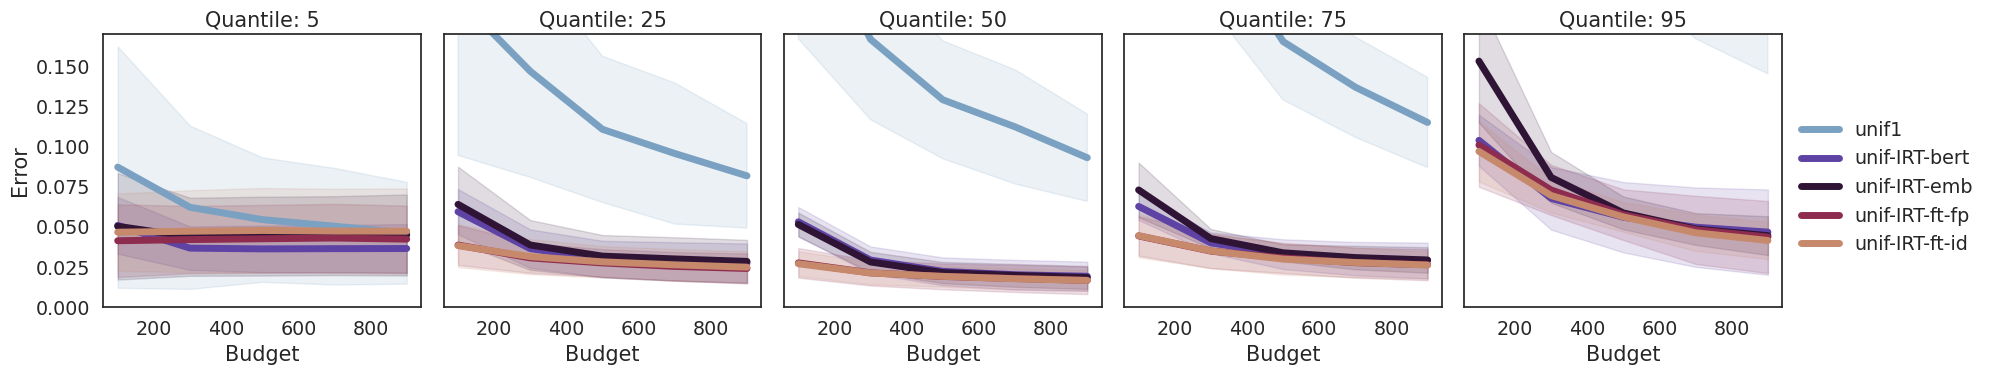

In [21]:
## Example of a FacetGrid

sns.set_style("white")
used_data_df = errors_df[errors_df['Method'].isin(methods_names_lucas)]

g = sns.FacetGrid(used_data_df, col="Quantile", hue="Method", height=4, palette='twilight', aspect=0.9)
g.map(sns.lineplot, "Budget", "Error", errorbar='sd', linewidth=5,err_kws={'alpha': 0.15})
g.set_titles("Quantile: {col_name}")

g.set(ylim=(0, .17))

g.add_legend(title='') 
g.despine(right=False, top=False)

plt.savefig(f'example_quantileplots.pdf', bbox_inches='tight', dpi=400, transparent=False)

/tmp/ipykernel_21913/1672675249.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_data['Budget'] = used_data['Budget'].apply(lambda x: round(x / bench_sizes[bench], 1) )
/tmp/ipykernel_21913/1672675249.py:14: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  g = sns.lineplot(data=used_data, x='Quantile', y='Error', hue='Budget', size='Budget',


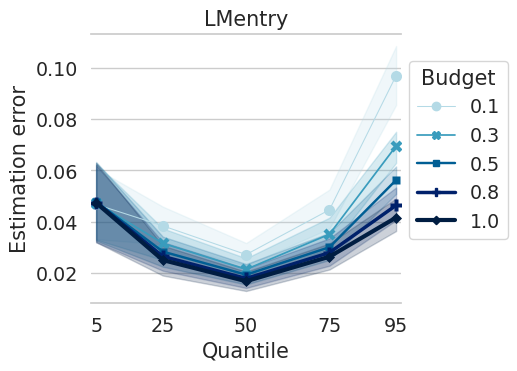

In [22]:
## Suggestion first page plot

sns.set(font_scale=1.25)
sns.set_style("whitegrid")

markersize=8
original_cmap = plt.cm.ocean_r 
palette = [original_cmap(i) for i in np.linspace(0.1, 0.9, 6)]

used_data = errors_df[errors_df['Method'].isin(best_methods)]
used_data['Budget'] = used_data['Budget'].apply(lambda x: round(x / bench_sizes[bench], 1) )

fig, ax = plt.subplots(figsize=(4, 3.5)) 
g = sns.lineplot(data=used_data, x='Quantile', y='Error', hue='Budget', size='Budget', 
             palette=palette, markers=True, style='Budget', dashes=False, linewidth=4, 
             markersize=markersize, markeredgecolor='none', ax=ax)

g.set(xlim=(3.5, 96.5), title=bench, ylabel='Estimation error')

ax.set_xticks([5, 25, 50, 75, 95])
ax.legend(title='Budget', bbox_to_anchor=(1.025, 0.9), loc=2, borderaxespad=0., )
sns.despine(ax=ax, left=True, right=True, top=False, bottom=False) 

ax.xaxis.grid(False)

plt.savefig('first_page_plot.pdf', bbox_inches='tight')